In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import pandas as pd
con_data = pd.read_csv('./data/con_data.csv').iloc[:, 1:]

In [3]:
data = con_data.dropna(axis = 0).copy()

In [4]:
data['cls_label'] = data.apply(lambda x: 1 if x['label'] >= 30 else 0, axis = 1)

In [5]:
data1 = data.drop(['label'], axis = 1)
data2 = data1.drop(['cls_label'], axis=1)

In [6]:
data_txt = []
for i in data2.columns:
    data_txt.append(i)
print(data_txt)
#print(data2.columns[0])

['text_amount', 'keyword_mentioned', 'commentNum', 'keyword_title_data', 'link_num_data', 'player_num_data', 'img_num_data', 'past_date', 'five_day_visitor']


In [7]:
X, y = data1.iloc[:, :-1], data1.iloc[:, -1]

In [8]:
from collections import Counter
import matplotlib.pyplot as plt

def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    plt.bar(counter.keys(), counter.values())
    plt.show()

Class=0, n=5430 (50.000%)
Class=1, n=5430 (50.000%)


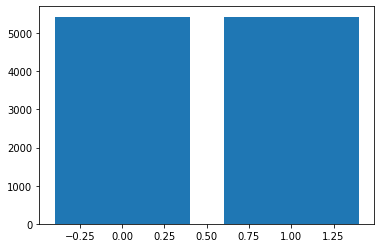

In [9]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state =42, test_size = 0.20)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

6 64
7 79


C:\Users\yongjin\Anaconda3\envs\capston\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


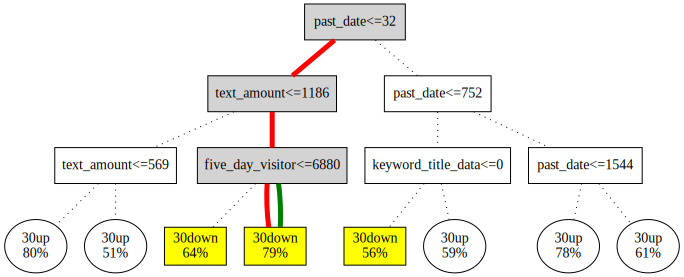

In [16]:
from func.decision_image import save_graph_as_svg

save_graph_as_svg(dtc = dtc, X_train=X_train, X_predict = X_train.iloc[1].values.tolist(), output_file_name = '1111', directory = './')